In [2]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
dfwine = pd.read_csv(r"C:\Users\pc\Desktop\DATASETS\wine.csv")

In [8]:
dfwine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
dfwine.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [10]:
dfwine.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [11]:
dfwine.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

<Axes: >

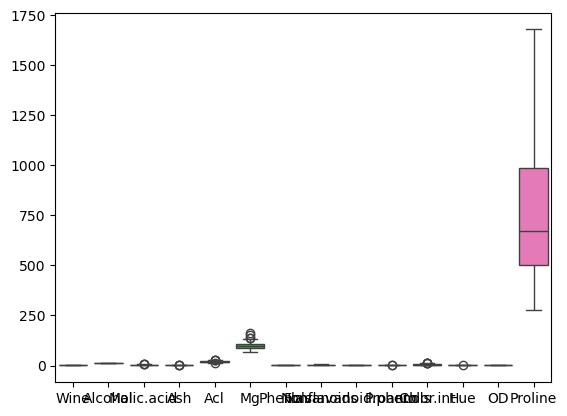

In [12]:
sns.boxplot(dfwine)


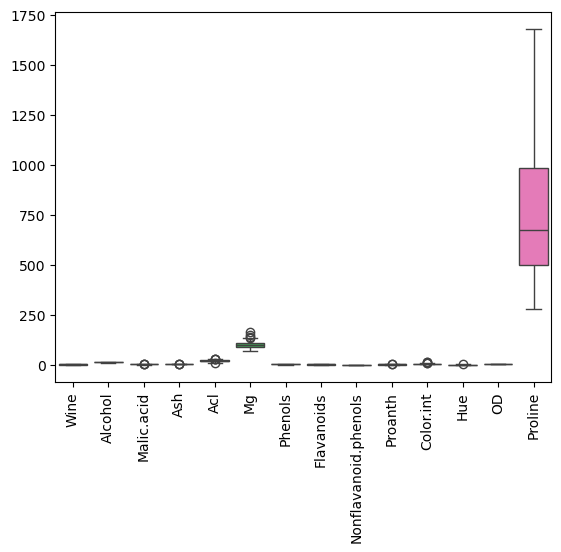

In [13]:
sns.boxplot(dfwine)
plt.xticks(rotation = 90)
plt.show()

In [14]:
cols = [ 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Proanth', 'Color.int', 'Hue']

In [15]:
cols

['Malic.acid', 'Ash', 'Acl', 'Mg', 'Proanth', 'Color.int', 'Hue']

In [16]:
for c in cols :
    print(c)

Malic.acid
Ash
Acl
Mg
Proanth
Color.int
Hue


In [17]:
for c in cols :
    print(dfwine[c])

0      1.71
1      1.78
2      2.36
3      1.95
4      2.59
       ... 
173    5.65
174    3.91
175    4.28
176    2.59
177    4.10
Name: Malic.acid, Length: 178, dtype: float64
0      2.43
1      2.14
2      2.67
3      2.50
4      2.87
       ... 
173    2.45
174    2.48
175    2.26
176    2.37
177    2.74
Name: Ash, Length: 178, dtype: float64
0      15.6
1      11.2
2      18.6
3      16.8
4      21.0
       ... 
173    20.5
174    23.0
175    20.0
176    20.0
177    24.5
Name: Acl, Length: 178, dtype: float64
0      127
1      100
2      101
3      113
4      118
      ... 
173     95
174    102
175    120
176    120
177     96
Name: Mg, Length: 178, dtype: int64
0      2.29
1      1.28
2      2.81
3      2.18
4      1.82
       ... 
173    1.06
174    1.41
175    1.35
176    1.46
177    1.35
Name: Proanth, Length: 178, dtype: float64
0       5.64
1       4.38
2       5.68
3       7.80
4       4.32
       ...  
173     7.70
174     7.30
175    10.20
176     9.30
177     9.20
Name:

In [18]:
for c in cols :
    sk = dfwine[c].skew().round()
    if sk == 0 or sk == -0 :
        print("ND")

else :
    print("SD")

ND
ND
ND
SD


In [22]:
for c in cols :
    sk = dfwine[c].skew().round()
    if sk == 0 or sk == -0 :
        m = dfwine[c].mean()
        s = dfwine[c].std()
        lower = m - 3*s
        upper = m + 3*s
        dfwine[c] = dfwine[c].map(lambda x : lower if x < lower else upper  if x > upper else x )

else :
    q1 = dfwine[c].quantile(0.25)
    q3 = dfwine[c].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    up = q3 + (1.5*iqr)
    dfwine[c] = dfwine[c].apply(lambda z : low if z < low else up if z > up else z )

<Axes: >

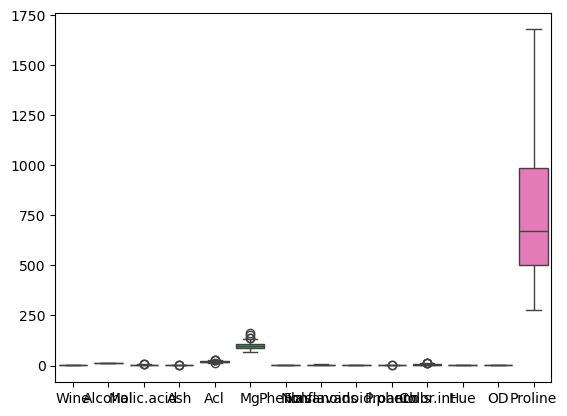

In [23]:
sns.boxplot(dfwine)

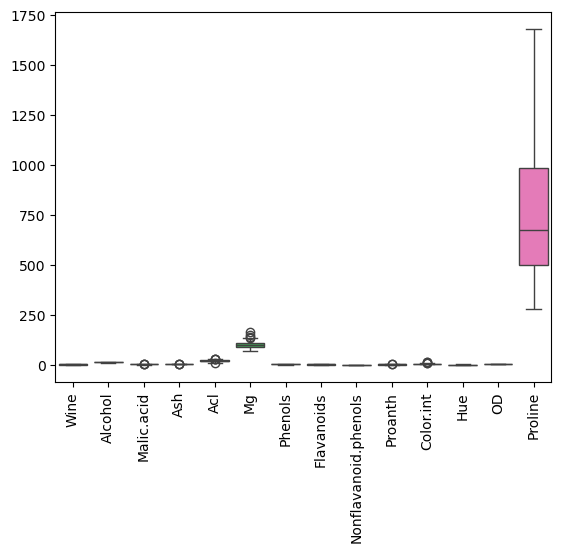

In [24]:
sns.boxplot(dfwine)
plt.xticks(rotation = 90)
plt.show()

In [26]:
dfwine['Mg']

0      127
1      100
2      101
3      113
4      118
      ... 
173     95
174    102
175    120
176    120
177     96
Name: Mg, Length: 178, dtype: int64

In [30]:
dfwine['Mg'].value_counts()

Mg
88     13
86     11
98      9
101     9
96      8
102     7
94      6
85      6
112     6
97      5
92      5
80      5
103     5
89      5
90      4
108     4
107     4
106     4
87      3
120     3
95      3
78      3
111     3
84      3
118     3
104     3
100     3
110     3
116     3
93      2
115     2
91      2
105     2
113     2
162     1
134     1
119     1
82      1
122     1
81      1
70      1
127     1
132     1
99      1
136     1
139     1
151     1
117     1
128     1
124     1
126     1
121     1
123     1
Name: count, dtype: int64

In [31]:
dfwine['Mg'].unique()

array([127, 100, 101, 113, 118, 112,  96, 121,  97,  98, 105,  95,  89,
        91, 102, 120, 115, 108, 116, 126, 124,  93,  94, 107, 106, 104,
       132, 110, 128, 117,  90, 103, 111,  92,  88,  87,  78, 151,  86,
       139, 136,  85,  99,  84,  70,  81,  80, 162, 134, 119,  82, 122,
       123], dtype=int64)

(array([ 4., 43., 40., 43., 24., 15.,  5.,  2.,  1.,  1.]),
 array([ 70. ,  79.2,  88.4,  97.6, 106.8, 116. , 125.2, 134.4, 143.6,
        152.8, 162. ]),
 <BarContainer object of 10 artists>)

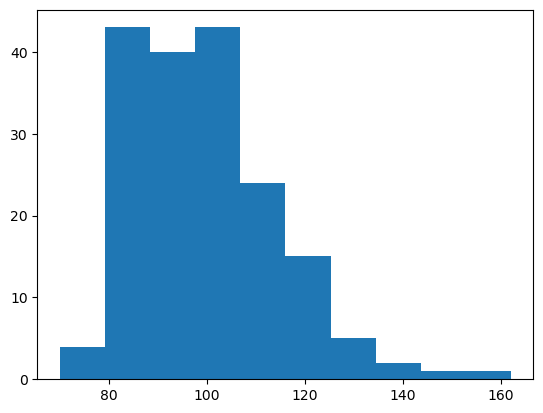

In [32]:
plt.hist(dfwine['Mg'])

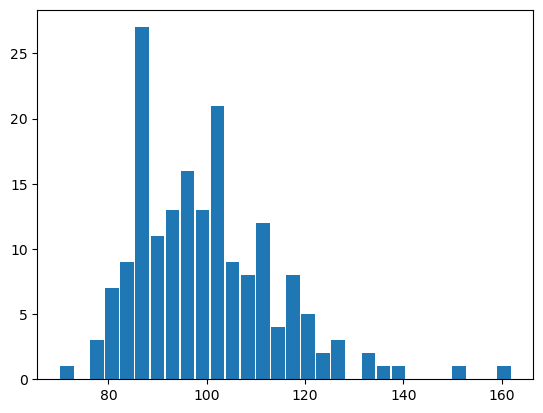

In [33]:
plt.hist(dfwine['Mg'], bins = 30, rwidth = 0.90)
plt.show()

In [35]:
dfwine['Mg'].skew().round()

1.0

In [44]:
q1 = dfwine['Mg'].quantile(0.25)
q3 = dfwine['Mg'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5 * iqr)
up = q3 + (1.5*iqr)

In [45]:
q1,q3

(88.0, 107.0)

In [46]:
iqr

19.0

In [47]:
low , up

(59.5, 135.5)

In [48]:
dfwine["Mg"].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Mg, dtype: float64

In [49]:
dfwine["Mg"].map(lambda z : low if z < low else up if z > up else z)

0      127.0
1      100.0
2      101.0
3      113.0
4      118.0
       ...  
173     95.0
174    102.0
175    120.0
176    120.0
177     96.0
Name: Mg, Length: 178, dtype: float64

In [50]:
dfwine["Mg"] = dfwine["Mg"].map(lambda z : low if z < low else up if z > up else z)

In [51]:
dfwine["Mg"]

0      127.0
1      100.0
2      101.0
3      113.0
4      118.0
       ...  
173     95.0
174    102.0
175    120.0
176    120.0
177     96.0
Name: Mg, Length: 178, dtype: float64

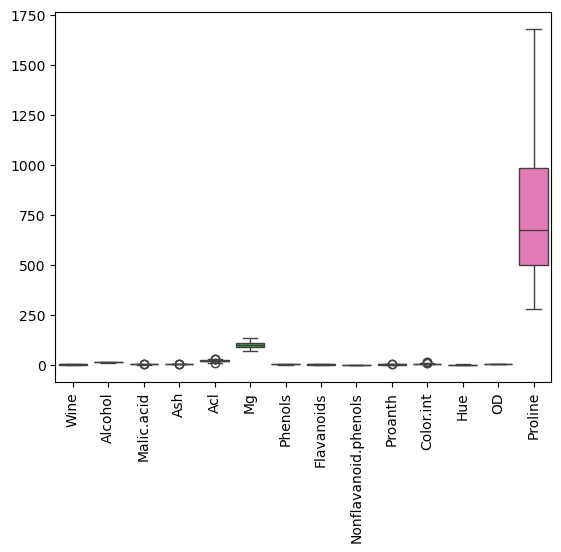

In [52]:
sns.boxplot(dfwine)
plt.xticks(rotation = 90)
plt.show()

### Data Seperation

In [53]:
X = dfwine.drop("Wine", axis = 1)

In [54]:
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [55]:
y = dfwine["Wine"]

In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [57]:
y.value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

<Axes: xlabel='Wine'>

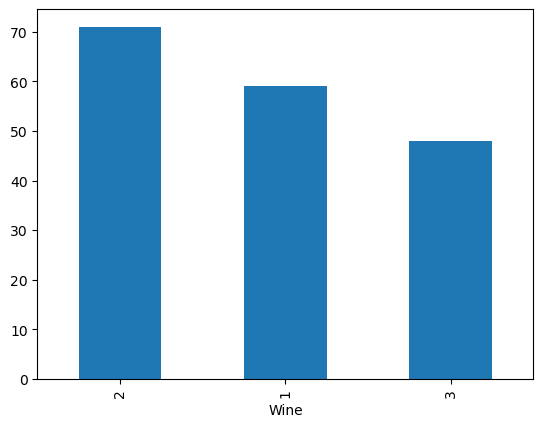

In [59]:
y.value_counts().plot(kind = "bar")

### Data Splitting

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.20, random_state = 2)

In [67]:
X.shape,X_train.shape,X_test.shape

((178, 13), (142, 13), (36, 13))

In [68]:
y.shape, y_train.shape,y_test.shape

((178,), (142,), (36,))

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada = AdaBoostClassifier(algorithm = "SAMME")

In [74]:
ada

AdaBoostClassifier(algorithm='SAMME')

In [75]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [76]:
ada.score(X_test,y_test)

0.9444444444444444

In [77]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.1/124.9 MB 504.4 kB/s eta 0:04:08
   ---------------------------------------- 0.2/124.9 MB 614.4 kB/s eta 0:03:24
   ---------------------------------------- 0.3/124.9 MB 853.3 kB/s eta 0:02:27
   ---------------------------------------- 0.4/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta 0:01:27
   ---------------------------------------- 0.8/124.9 MB 1.6 MB/s eta 0:01:17
   -

In [92]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [93]:
from xgboost import XGBClassifier

In [94]:
xgb = XGBClassifier()

In [95]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
rfc = RandomForestClassifier()

In [97]:
gbc = GradientBoostingClassifier()

In [102]:
ada1 = AdaBoostClassifier(algorithm = "SAMME")

In [103]:
models = [rfc, gbc, ada1]

In [104]:
models 

[RandomForestClassifier(),
 GradientBoostingClassifier(),
 AdaBoostClassifier(algorithm='SAMME')]

In [105]:
import time

In [106]:
for m in models :
    m.fit(X_train, y_train)
    s = m.score(X_test,y_test)
    print(m, end = "-->")
    print(s)
    time.sleep(1)
    

RandomForestClassifier()-->0.9722222222222222
GradientBoostingClassifier()-->0.9166666666666666
AdaBoostClassifier(algorithm='SAMME')-->0.9444444444444444


In [107]:
from sklearn.svm import SVC

In [108]:
sv = SVC()

In [109]:
sv

SVC()

In [110]:
ada2 = AdaBoostClassifier(estimator = sv, algorithm = "SAMME") 

In [111]:
ada2

AdaBoostClassifier(algorithm='SAMME', estimator=SVC())

In [112]:
ada2.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=SVC())

In [113]:
ada2.score(X_test,y_test)

0.25

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression()

In [116]:
ada3 = AdaBoostClassifier(estimator = lr , algorithm = "SAMME")

In [117]:
ada3

AdaBoostClassifier(algorithm='SAMME', estimator=LogisticRegression())

In [119]:
ada3.fit(X_train,y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AdaBoostClassifier(algorithm='SAMME', estimator=LogisticRegression())

In [120]:
ada3.score(X_test, y_test)

0.8888888888888888